210803 - Korea Univ. Machine Learning Mini Project

1. 변수간 Correlation 보임, big data 분석 시 처리 과정
2. Uniform Data Outlier 처리
3. Scaling은 크게 영향미치지 않음
4. 변수 선별 및 제거 후 성능파악

In [46]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm


# 기계학습 모델 구축 및 평가 패키지
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler,MinMaxScaler, MaxAbsScaler,RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from collections import Counter

# 경고 숨기기
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import ensemble
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt

# MAPE def.
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [4]:
# 데이터 불러오기
data = pd.read_csv("C:/py_workspace/korea_py/prj_st/pt_train_dt.csv")

## Data 탐색 및 전처리

In [11]:
data.head(3)

,lot_id,wf,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_395,x_396,x_397,x_398,x_399,x_400,y_1,y_2,y_3,split
0,TDRM795W,9,1.473766,85.908215,249.959409,47.834938,856.046648,2500.0,0.495354,0.565273,...,64.0,64.0,64.0,64.0,64.0,64.0,56.55,58.9400,57.5425,train
1,TDRM129W,3,0.023678,99.979704,249.959409,0.270607,1001.481572,2500.0,0.000000,0.000000,...,55.0,55.0,55.0,55.0,55.0,55.0,57.68,59.7750,58.2325,train
2,TDRLY92W,11,0.007380,88.220968,249.959409,0.000000,882.352941,2500.0,0.366233,0.470358,...,75.0,75.0,75.0,75.0,75.0,75.0,54.67,58.4675,56.1875,train


In [5]:
d_columns = data.columns[1:402]

In [6]:
for col in d_columns:
    data[col] = data[col].fillna(data[col].median())

In [7]:
X = data.drop(['lot_id','wf','split','y_1','y_2','y_3'], axis=1)
Y = data[['y_1','y_2','y_3']]

In [40]:
cor_X1 = data.iloc[:,2:10]
cor_X2 = data.iloc[:,11:21]
cor_X3 = data.iloc[:,22:31]
cor_X4 = data.iloc[:,32:41]
cor_X5 = data.iloc[:,42:51]
cor_X6 = data.iloc[:,52:61]

In [32]:
cor_X

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8
0,1.473766,85.908215,249.959409,47.834938,856.046648,2500.000000,0.495354,0.565273
1,0.023678,99.979704,249.959409,0.270607,1001.481572,2500.000000,0.000000,0.000000
2,0.007380,88.220968,249.959409,0.000000,882.352941,2500.000000,0.366233,0.470358
3,0.000000,89.683981,249.959409,0.146128,890.160740,2500.000000,0.529817,0.585418
4,0.012989,99.983764,249.959409,0.259782,997.645722,2500.000000,0.000000,0.000000
5,0.000000,93.602858,249.959409,0.000000,937.500000,2500.000000,0.463896,0.419642
6,0.000000,79.532539,242.148177,0.067652,801.100385,2421.862315,0.452705,0.443919
7,0.000000,93.734778,249.959409,0.000000,937.474631,2500.000000,0.532259,0.579869
8,10.431888,105.678682,249.959409,104.504925,1107.200844,2500.000000,0.000000,1.818959
9,9.269783,105.246067,249.959409,92.878233,1052.631579,2500.000000,0.000000,0.000000


In [48]:
# for b0, 상수항 추가
X_const = sm.add_constant(X, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(Y['y_1'], X_const)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_1   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     69.46
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:11:40   Log-Likelihood:            -1.6745e+05
No. Observations:              110125   AIC:                         3.356e+05
Df Residuals:                  109757   BIC:                         3.392e+05
Df Model:                         367                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.8658     32.212      1.983      0.047       0.731     127.001
x_1            0.0062      0.003      1.899      0.058      -0.000       0.013
x_2           -0.0232      0.001    -20.920      0.000      -0.025      -0.021
x_3           -0.0448      0.007     -6.023      0.000      -0.059      -0.030
x_4           -0.0003      0.000     -0.831      0.406      -0.001       0.000
x_5            0.0034      0.000     31.969      0.000       0.003       0.004
x_6            0.0021      0.001      2.316      0.021       0.000       0.004
x_7           -0.2683      0.008    -32.385      0.000      -0.285      -0.252
x_8           -0.1279      0.006    -21.772      0.000      -0.139      -0.116
x_9            0.0567      0.002     24.778      0.000       0.052       0.061
x_10          -0.0021      0.001     -1.787      0.074      -0.004       0.000
x_11           0.0422      0.007      6.478      0.000       0.029       0.055
x_12          -0.0693      0.013     -5.472      0.000      -0.094      -0.044
x_13           0.0580      0.015      3.832      0.000       0.028       0.088
x_14           0.0017      0.019      0.088      0.930      -0.036       0.040
x_15          -0.0458      0.025     -1.829      0.067      -0.095       0.003
x_16           0.0166      0.023      0.708      0.479      -0.029       0.063
x_17           0.0260      0.018      1.412      0.158      -0.010       0.062
x_18          -0.0271      0.012     -2.210      0.027      -0.051      -0.003
x_19          -0.0004      0.005     -0.094      0.925      -0.009       0.009
x_20           0.0044      0.001      3.425      0.001       0.002       0.007
x_21       -2.525e-05      0.000     -0.088      0.930      -0.001       0.001
x_22          -0.0465      0.107     -0.434      0.664      -0.257       0.164
x_23           0.0486      0.058      0.845      0.398      -0.064       0.161
x_24           0.0157      0.061      0.257      0.797      -0.104       0.136
x_25          -0.0462      0.044     -1.052      0.293      -0.132       0.040
x_26           0.0074      0.074      0.100      0.920      -0.137       0.152
x_27           0.0665      0.054      1.242      0.214      -0.038       0.171
x_28           0.0258      0.023      1.140      0.254      -0.019       0.070
x_29           0.0059      0.024      0.253      0.800      -0.040       0.052
x_30          -0.0990      0.063     -1.562      0.118      -0.223       0.025
x_31           0.0001      0.000      0.696      0.486      -0.000       0.000
x_32          -0.0322      0.050     -0.640      0.522      -0.131       0.066
x_33           0.0061      0.008      0.769      0.442      -0.009       0.022
x_34           0.1447      0.040      3.616      0.000       0.066       0.223
x_35          -0.0003      0.000     -0.782      0.434      -0.001       0.000
x_

In [49]:
multi_model = sm.OLS(Y['y_2'], X_const)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_2   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     50.80
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:11:45   Log-Likelihood:            -1.2745e+05
No. Observations:              110125   AIC:                         2.556e+05
Df Residuals:                  109757   BIC:                         2.592e+05
Df Model:                         367                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -58.2121     22.402     -2.599      0.009    -102.119     -14.305
x_1            0.0059      0.002      2.614      0.009       0.001       0.010
x_2           -0.0037      0.001     -4.862      0.000      -0.005      -0.002
x_3           -0.0018      0.005     -0.348      0.728      -0.012       0.008
x_4           -0.0006      0.000     -2.363      0.018      -0.001   -9.61e-05
x_5            0.0010   7.31e-05     13.508      0.000       0.001       0.001
x_6           -0.0004      0.001     -0.726      0.468      -0.002       0.001
x_7           -0.0243      0.006     -4.221      0.000      -0.036      -0.013
x_8           -0.0207      0.004     -5.066      0.000      -0.029      -0.013
x_9            0.0095      0.002      5.978      0.000       0.006       0.013
x_10           0.0001      0.001      0.132      0.895      -0.001       0.002
x_11           0.0317      0.005      7.003      0.000       0.023       0.041
x_12          -0.0486      0.009     -5.518      0.000      -0.066      -0.031
x_13           0.0368      0.011      3.497      0.000       0.016       0.057
x_14           0.0260      0.014      1.919      0.055      -0.001       0.053
x_15          -0.0758      0.017     -4.349      0.000      -0.110      -0.042
x_16           0.0506      0.016      3.103      0.002       0.019       0.083
x_17           0.0071      0.013      0.556      0.578      -0.018       0.032
x_18          -0.0227      0.009     -2.666      0.008      -0.039      -0.006
x_19          -0.0052      0.003     -1.627      0.104      -0.012       0.001
x_20          -0.0046      0.001     -5.148      0.000      -0.006      -0.003
x_21        8.234e-05      0.000      0.415      0.678      -0.000       0.000
x_22          -0.0227      0.075     -0.305      0.761      -0.169       0.123
x_23           0.0341      0.040      0.853      0.394      -0.044       0.113
x_24           0.0739      0.043      1.735      0.083      -0.010       0.157
x_25          -0.0378      0.031     -1.238      0.216      -0.098       0.022
x_26           0.0877      0.051      1.711      0.087      -0.013       0.188
x_27           0.1019      0.037      2.737      0.006       0.029       0.175
x_28           0.0253      0.016      1.606      0.108      -0.006       0.056
x_29           0.0397      0.016      2.429      0.015       0.008       0.072
x_30          -0.3809      0.044     -8.638      0.000      -0.467      -0.294
x_31           0.0002      0.000      1.616      0.106   -3.79e-05       0.000
x_32          -0.1046      0.035     -2.989      0.003      -0.173      -0.036
x_33           0.0048      0.006      0.868      0.386      -0.006       0.016
x_34           0.4882      0.028     17.537      0.000       0.434       0.543
x_35          -0.0004      0.000     -1.608      0.108      -0.001    8.38e-05
x_

In [50]:
multi_model = sm.OLS(Y['y_3'], X_const)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_3   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     61.17
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:11:49   Log-Likelihood:            -1.4044e+05
No. Observations:              110125   AIC:                         2.816e+05
Df Residuals:                  109757   BIC:                         2.851e+05
Df Model:                         367                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.6392     25.205      0.978      0.328     -24.762      74.041
x_1            0.0033      0.003      1.311      0.190      -0.002       0.008
x_2           -0.0149      0.001    -17.211      0.000      -0.017      -0.013
x_3           -0.0248      0.006     -4.263      0.000      -0.036      -0.013
x_4        -9.633e-05      0.000     -0.358      0.720      -0.001       0.000
x_5            0.0023   8.22e-05     28.198      0.000       0.002       0.002
x_6            0.0010      0.001      1.415      0.157      -0.000       0.002
x_7           -0.1748      0.006    -26.954      0.000      -0.187      -0.162
x_8           -0.0891      0.005    -19.376      0.000      -0.098      -0.080
x_9            0.0334      0.002     18.650      0.000       0.030       0.037
x_10          -0.0008      0.001     -0.906      0.365      -0.003       0.001
x_11           0.0402      0.005      7.881      0.000       0.030       0.050
x_12          -0.0658      0.010     -6.643      0.000      -0.085      -0.046
x_13           0.0528      0.012      4.459      0.000       0.030       0.076
x_14           0.0045      0.015      0.293      0.770      -0.025       0.034
x_15          -0.0416      0.020     -2.123      0.034      -0.080      -0.003
x_16           0.0167      0.018      0.912      0.362      -0.019       0.053
x_17           0.0238      0.014      1.648      0.099      -0.004       0.052
x_18          -0.0302      0.010     -3.150      0.002      -0.049      -0.011
x_19           0.0004      0.004      0.107      0.914      -0.007       0.007
x_20          -0.0004      0.001     -0.393      0.694      -0.002       0.002
x_21       -7.329e-05      0.000     -0.328      0.743      -0.001       0.000
x_22           0.0095      0.084      0.113      0.910      -0.155       0.174
x_23           0.0513      0.045      1.140      0.254      -0.037       0.139
x_24           0.0728      0.048      1.519      0.129      -0.021       0.167
x_25          -0.0325      0.034     -0.946      0.344      -0.100       0.035
x_26           0.0326      0.058      0.565      0.572      -0.080       0.146
x_27           0.0772      0.042      1.844      0.065      -0.005       0.159
x_28           0.0235      0.018      1.326      0.185      -0.011       0.058
x_29           0.0263      0.018      1.431      0.153      -0.010       0.062
x_30          -0.2416      0.050     -4.869      0.000      -0.339      -0.144
x_31           0.0001      0.000      1.002      0.316      -0.000       0.000
x_32          -0.0556      0.039     -1.411      0.158      -0.133       0.022
x_33           0.0064      0.006      1.031      0.303      -0.006       0.019
x_34           0.2833      0.031      9.045      0.000       0.222       0.345
x_35       -9.874e-05      0.000     -0.368      0.713      -0.001       0.000
x_

## 변수간 Correlation 보임, 대량 data 확인 후 처리 필요

In [8]:
# 학습 : 검증 : 테스트 = 6 : 3 : 1 데이터 분리
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.4, random_state=2021)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_valid, Y_valid, test_size=0.25, random_state=2021)

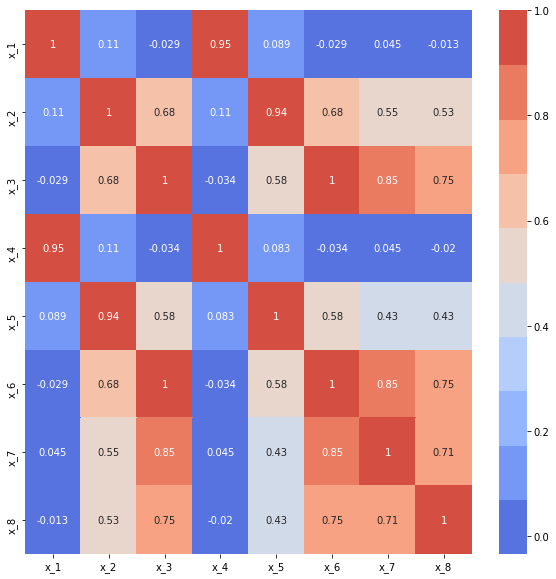

In [34]:
plt.figure(figsize=(10, 10))
sns.heatmap(cor_X1.corr(), cmap=sns.color_palette("coolwarm", 10), annot=True)
# sns.heatmap(data.corr(), cmap="jet", annot=True) ## Color map 변경 
# sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=False) ## Annot 변경
plt.show()

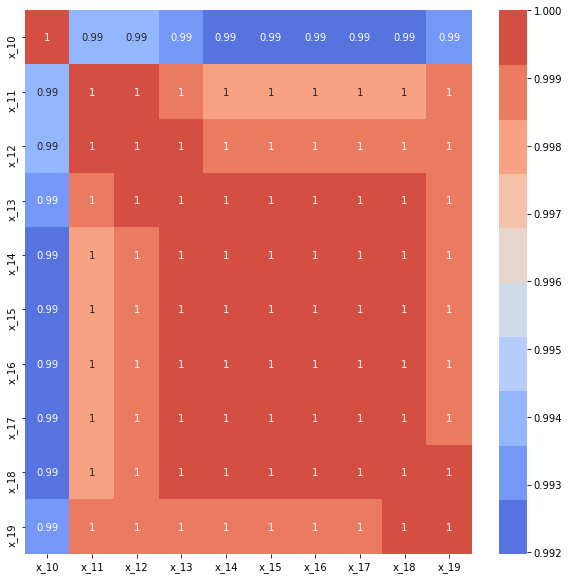

In [41]:
plt.figure(figsize=(10, 10))
sns.heatmap(cor_X2.corr(), cmap=sns.color_palette("coolwarm", 10), annot=True)
# sns.heatmap(data.corr(), cmap="jet", annot=True) ## Color map 변경 
# sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=False) ## Annot 변경
plt.show()

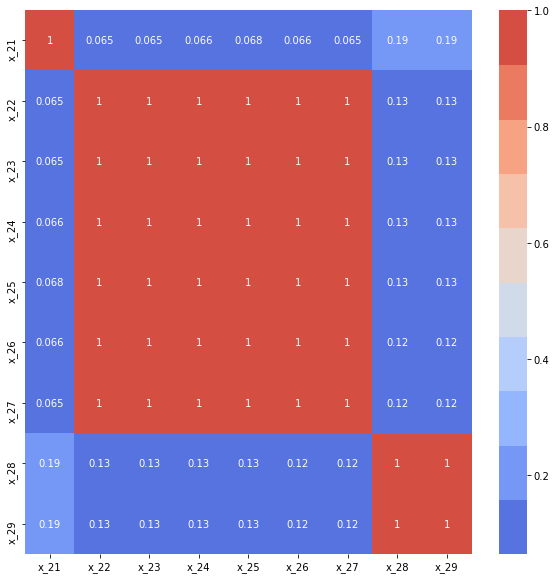

In [42]:
plt.figure(figsize=(10, 10))
sns.heatmap(cor_X3.corr(), cmap=sns.color_palette("coolwarm", 10), annot=True)
# sns.heatmap(data.corr(), cmap="jet", annot=True) ## Color map 변경 
# sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=False) ## Annot 변경
plt.show()

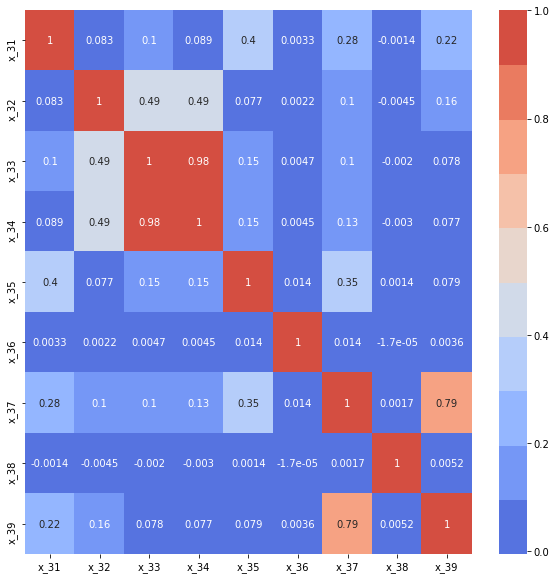

In [43]:
plt.figure(figsize=(10, 10))
sns.heatmap(cor_X4.corr(), cmap=sns.color_palette("coolwarm", 10), annot=True)
# sns.heatmap(data.corr(), cmap="jet", annot=True) ## Color map 변경 
# sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=False) ## Annot 변경
plt.show()

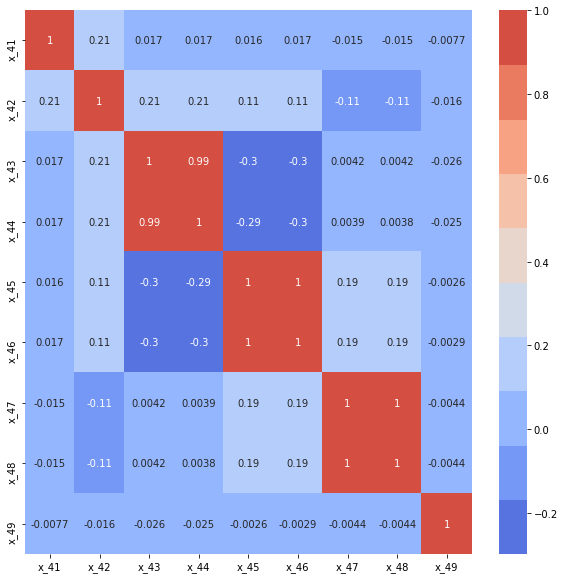

In [44]:
plt.figure(figsize=(10, 10))
sns.heatmap(cor_X5.corr(), cmap=sns.color_palette("coolwarm", 10), annot=True)
# sns.heatmap(data.corr(), cmap="jet", annot=True) ## Color map 변경 
# sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=False) ## Annot 변경
plt.show()

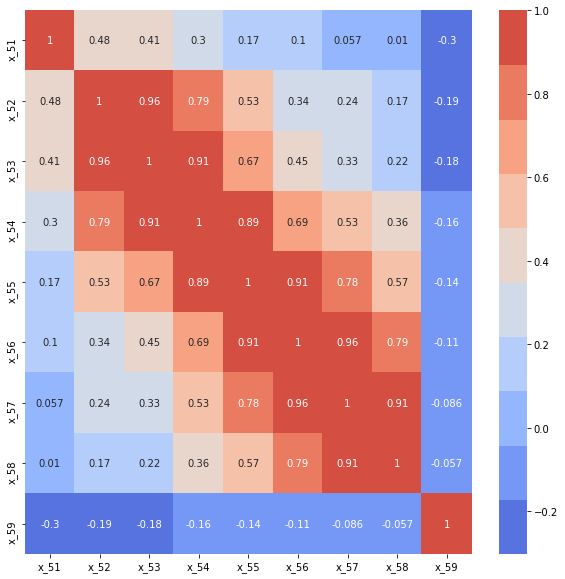

In [45]:
plt.figure(figsize=(10, 10))
sns.heatmap(cor_X6.corr(), cmap=sns.color_palette("coolwarm", 10), annot=True)
# sns.heatmap(data.corr(), cmap="jet", annot=True) ## Color map 변경 
# sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=False) ## Annot 변경
plt.show()

### Outlier 처리

# Scaling

### Standard Scaler

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_st = std_scaler.transform(X_train)
X_valid_st = std_scaler.transform(X_valid)
X_test_st = std_scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train_st).describe()

### Robust Scaler

In [ ]:
Robust_scaler = RobustScaler()
Robust_scaler.fit(X_train)
X_train_RB = Robust_scaler.transform(X_train)
X_valid_RB = Robust_scaler.transform(X_valid)
X_test_RB = Robust_scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train_RB).describe()

### MaxAbs Scaler

In [ ]:
MA_scaler = MaxAbsScaler()
MA_scaler.fit(X_train)
X_train_MA = MA_scaler.transform(X_train)
X_valid_MA = MA_scaler.transform(X_valid)
X_test_MA = MA_scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train_MA).describe()

# Modeling

### Linear Regression

In [ ]:
model_LR_st = LinearRegression().fit(X_train_st, Y_train)
model_LR_st.score(X_train_st, Y_train)
model_LR_st.coef_
model_LR_st.intercept_
model_LR_st.predict(X_test_st)

In [ ]:
# 선형 회귀 모델 학습 - Standard Scaler
model_LR_RB = LinearRegression().fit(X_train_RB, Y_train)
model_LR_RB.score(X_train_RB, Y_train)
model_LR_RB.coef_
model_LR_RB.intercept_
model_LR_RB.predict(X_test_RB)

In [ ]:
model_LR_MA = LinearRegression().fit(X_train_MA, Y_train)
model_LR_MA.score(X_train_MA, Y_train)
model_LR_MA.coef_
model_LR_MA.intercept_
model_LR_MA.predict(X_test_MA)

In [ ]:
model_LR_st.score(X_train_st, Y_train)

In [ ]:
model_LR_RB.score(X_train_RB, Y_train)

In [ ]:
model_LR_MA.score(X_train_MA, Y_train)

In [ ]:
train_y_pred_st = model_LR_st.predict(X_train_st)

In [ ]:
train_y_pred_RB = model_LR_RB.predict(X_train_RB)

In [ ]:
train_y_pred_MA = model_LR_MA.predict(X_train_MA)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_st)))

In [ ]:
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_RB)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_RB))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_RB)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_RB)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_RB)))

In [ ]:
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_MA)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_MA))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_MA)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_MA)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_MA)))

In [ ]:
fig_values = np.concatenate([Y_train.squeeze(), train_y_pred_st.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Training Data)', size=18)
plt.scatter(Y_train, train_y_pred_st)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.show()

In [ ]:
fig_values = np.concatenate([Y_train.squeeze(), train_y_pred_RB.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Training Data)', size=18)
plt.scatter(Y_train, train_y_pred_RB)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.show()

In [ ]:
fig_values = np.concatenate([Y_train.squeeze(), train_y_pred_MA.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Training Data)', size=18)
plt.scatter(Y_train, train_y_pred_MA)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.show()

### Ridge / Lasso / ElasticNet Regression ( with CV )

In [ ]:
alphas = np.logspace(-4, 0, 10)

In [ ]:
ridge = Ridge()

parameters = {'alpha': alphas }
ridge_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X_train_RB,Y_train)
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

In [ ]:
train_scores = []
test_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = -mean_squared_error(Y_test, model.fit(X_train_RB, Y_train).predict(X_test_RB))
    test_score = np.mean(cross_val_score(model, X_train_RB, Y_train, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)
optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

plt.plot(alphas, test_scores, "-", label="test ")
plt.plot(alphas, train_scores, "--", label="train")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("Best Regularization")
plt.ylabel('score')
plt.xlabel('Regularization')
plt.legend()
plt.show()

In [ ]:
lasso = Lasso()
parameters = {'alpha': alphas }
lasso_reg = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train_st,Y_train)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

In [ ]:
elasticnet = ElasticNet()
parameters = {'alpha': alphas }

elasticnet_reg = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error',cv=5)
elasticnet_reg.fit(X_train_RB, Y_train)
print(elasticnet_reg.best_params_)
print(elasticnet_reg.best_score_)

### Decision tree

In [ ]:
max_depths = list(range(1, 20)) + [None]
print(max_depths)

rmse_valid = []
mae_valid = []

In [ ]:
for max_depth in max_depths:
    
    # 모델 학습
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train_RB, Y_train)
    
    # validation 예측
    y_valid_pred = model.predict(X_valid_RB)
    
    # 모델 평가 결과 저장
    rmse = np.sqrt(mean_squared_error(Y_valid, y_valid_pred))
    mae = mean_absolute_error(Y_valid, y_valid_pred)
    
    rmse_valid.append(rmse)
    mae_valid.append(mae)

In [ ]:
xticks = list(map(str, max_depths))
print(xticks)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(range(len(max_depths)), rmse_valid, color='red', marker='o')
ax.set_ylabel('RMSE', color='red', fontsize=12)

ax2 = ax.twinx()
ax2.plot(range(len(max_depths)), mae_valid, color='blue', marker='s')
ax2.set_ylabel('MAE', color='blue', fontsize=12)

plt.xticks(range(len(max_depths)), xticks)
plt.show()

In [ ]:
model_r = DecisionTreeRegressor(max_depth=9)
model_r.fit(X_train_st, Y_train)

In [ ]:
# validation 예측
y_test_pred = model_r.predict(X_test_st)
y_valid_pred = model_r.predict(X_valid_st)

# RMSE , MAE
rmse_t = np.sqrt(mean_squared_error(Y_test, y_test_pred))
mae_t = mean_absolute_error(Y_test, y_test_pred)

rmse_tv = np.sqrt(mean_squared_error(Y_valid, y_valid_pred))
mae_tv = mean_absolute_error(Y_valid, y_valid_pred)

print('- RMSE (Test) : {:.6f}'.format(rmse_t))
print('- MAE  (Test) : {:.6f}'.format(mae_t))

print('- RMSE (Test) : {:.6f}'.format(rmse_tv))
print('- MAE  (Test) : {:.6f}'.format(mae_tv))

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_test_pred, s=15)
plt.plot(Y_test, Y_test, alpha=0.5, lw=2, color='red')
plt.xlabel('true', fontsize=12)
plt.ylabel('predict', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_valid, y_valid_pred, s=15)
plt.plot(Y_test, Y_test, alpha=0.5, lw=2, color='red')
plt.xlabel('true', fontsize=12)
plt.ylabel('predict', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree=model_r, filled=True)
plt.show()

In [ ]:
# 변수 중요도
importances = model.feature_importances_

# 내림차순으로 정렬하기 위한 index
index = np.argsort(importances)[::-1]

In [ ]:
plt.figure(figsize=(24, 18))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[index],align='center')
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.xlim([-1, 20])
plt.show()

* Random forest trees

In [ ]:
var_name = np.array(data.columns[1:])

In [ ]:
mseOos = []
nTreeList = range(50, 500, 10)


for iTrees in nTreeList:
    depth = None
    maxFeat = 4 #조정해볼 것
    wineRFModel = ensemble.RandomForestRegressor(n_estimators=iTrees,
                    max_depth=depth, max_features=maxFeat,
                    oob_score=False, random_state=531)
    wineRFModel.fit(X_train_RB, Y_train)
    #데이터 세트에 대한 MSE 누적
    prediction = wineRFModel.predict(X_valid_RB)
    mseOos.append(mean_squared_error(Y_valid, prediction))
print("MSE")
print(mseOos)

In [ ]:
plt.plot(nTreeList, mseOos)
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plt.show()

#피처 중요도 도표 그리기
featureImportance = wineRFModel.feature_importances_

#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, var_name[sorted_idx])
plt.xlabel('Variable Importance')
plt.show()

In [ ]:
regr = RandomForestRegressor(max_depth=4, random_state=531,
                          n_estimators=150)
regr.fit(X_train_RB, Y_train)
prediction = regr.predict(X_valid_RB)
print(mean_squared_error(Y_valid, prediction))
featureImportance = regr.feature_importances_

#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, var_name[sorted_idx])
plt.xlabel('Variable Importance')
plt.show()

* Gradient boosting Regression

In [ ]:
gbr_params = {'n_estimators': range(100,200,10),
          'max_depth': [3,4,5,6],
          'min_samples_split': [3,4,5],
          'learning_rate': [0.0001,0.001,0.01,0.1]
             }

In [ ]:
gbr= GradientBoostingRegressor(random_state = 2020)

gcv= GridSearchCV(estimator = gbr,
                 param_grid=gbr_params,
                 scoring = "roc_auc",
                 n_jobs=4,
                 cv=5
                 )

gcv.fit(X_train_st, Y_train['y_1'])
print("Best CV Score", gcv.best_score_)
print("Best Params", gcv.best_params_)

model_1 = GradientBoostingClassifier(**gcv.best_params_)

model_1.fit(X_train_st, Y_train['y_1'])

In [ ]:
gcv.fit(X_train_st, Y_train['y_2'])
print("Best CV Score", gcv.best_score_)
print("Best Params", gcv.best_params_)

model_2 = GradientBoostingClassifier(**gcv.best_params_)

model_2.fit(X_train_st, Y_train['y_2'])

In [ ]:
gcv.fit(X_train_st, Y_train['y_3'])
print("Best CV Score", gcv.best_score_)
print("Best Params", gcv.best_params_)

model_3 = GradientBoostingClassifier(**gcv.best_params_)

model_3.fit(X_train_st, Y_train['y_3'])

In [ ]:
print("Model Accuracy y1: %.3f" % model_1.score(X_test_RB, Y_test['y_1']))

In [ ]:
print("Model Accuracy y2: %.3f" % model_2.score(X_test_RB, Y_test['y_2']))

In [ ]:
print("Model Accuracy y3: %.3f" % model_3.score(X_test_RB, Y_test['y_3']))

In [ ]:
mse = mean_squared_error(Y_test['y_1'], model_1.predict(X_test_RB))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

In [ ]:
mse = mean_squared_error(Y_test['y_2'], model_2.predict(X_test_RB))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

In [ ]:
mse = mean_squared_error(Y_test['y_3'], model_3.predict(X_test_RB))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

In [ ]:
feature_importance = model_1.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, featureImportance[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(model_1, X_test_st, Y_test['y_1'], n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

In [ ]:
test_score_1 = np.zeros((gbr_params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(model_1.staged_predict(X_test_st)):
    test_score_1[i] = model_1.loss_(Y_test['y_1'], y_pred)

In [ ]:

fig = plt.figure(figsize=(8,6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, model_ 1.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, test_score_1, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

* MLP Regressor

In [ ]:
model_mlp = [
    LinearRegression(), 
    MLPRegressor(hidden_layer_sizes=[512, 4], alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[48, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[512, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[1024, 4], max_iter=5000, alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[1024, 512, 4], max_iter=5000, alpha=0.005, random_state=42),
]

for m in model_mlp:
    m.fit(X_train_RB, Y_train)
    print(m.__class__)
    print(r2_score(Y_train, m.predict(X_train_RB)))
    print(r2_score(Y_test, m.predict(X_test_RB)))

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(X_train_RB, Y_train, marker='^', s=50, alpha=0.7, label='y_true')
for i, m in enumerate(models):
    plt.scatter(X_train_RB, m.predict(X_train_RB), marker='o', s=10, alpha=0.7, label='nn_{}'.format(i))
plt.legend()
plt.show()

In [ ]:
train_history.history.keys()

val_loss_lst = train_history.history['val_loss']
train_loss_lst = train_history.history['loss']

plt.figure(figsize=(12, 4))
plt.plot(range(0, len(val_loss_lst)), val_loss_lst, label='val_loss')
plt.plot(range(0, len(train_loss_lst)), train_loss_lst, label='train_loss')
plt.legend()
plt.show()

## 테스트 데이터셋 성능 평가

In [ ]:
# 학습 데이터 예측 값
MSE_value = mean_squared_error(Y_test, y_test_pred)
RMSE_value = np.sqrt(mean_squared_error(Y_test, y_test_pred))
MAE_value = mean_absolute_error(Y_test, y_test_pred)
MAPE_value = mean_absolute_percentage_error(Y_test, y_test_pred)
r2_value = r2_score(Y_test, y_test_pred)

print("Testing MSE : {:.3f}".format(MSE_value))
print("Testing RMSE : {:.3f}".format(RMSE_value))
print("Testing MAE : {:.3f}".format(MAE_value))
print("Testing MAPE : {:.3f}".format(MAPE_value))
print("Testing R2 : {:.3f}".format(r2_value))

## 변수 선별

In [ ]:
# 제거할 변수 이름
drop_var = 

# 설정한 변수 제거
train_data_new = train_data.drop(drop_var, axis=1)
test_data_new = test_data.drop(drop_var, axis=1)

- 테스트 데이터 성능 평가

In [ ]:
# 변수가 제거된 데이터로 학습
lm_new = sm.OLS(train_data_new['MEDV'], train_data_new.drop('MEDV', axis=1))
lm_new_trained = lm_new.fit()
display(lm_new_trained.summary())

In [ ]:
# 학습 데이터 실제 값
test_true = test_data_new['MEDV']

# 학습 데이터 예측 값
test_pred = lm_new_trained.predict(test_data_new.drop(['MEDV'], axis=1))

new_MSE_value = mean_squared_error(test_true, test_pred)
new_RMSE_value = np.sqrt(mean_squared_error(test_true, test_pred))
new_MAE_value = mean_absolute_error(test_true, test_pred)
new_MAPE_value = mean_absolute_percentage_error(test_true, test_pred)
new_r2_value = r2_score(test_true, test_pred)

print('Testing MSE: {:.3f} → {:.3f}'.format(MSE_value, new_MSE_value))
print('Testing RMSE: {:.3f} → {:.3f}'.format(RMSE_value, new_RMSE_value))
print('Testing MAE: {:.3f} → {:.3f}'.format(MAE_value, new_MAE_value))
print('Testing MAPE: {:.3f} → {:.3f}'.format(MAPE_value, new_MAPE_value))
print('Testing R2: {:.3f} → {:.3f}'.format(r2_value, new_r2_value))

* 상관계수가 높은 변수 제거하기

In [ ]:
plt.figure(figsize=(10, 9))
sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=True)
plt.show()

In [ ]:
# 제거할 변수 이름
drop_var = "TAX"

# 설정한 변수 제거
train_data_new = train_data.drop(drop_var, axis=1)
test_data_new = test_data.drop(drop_var, axis=1)

In [ ]:
# 변수가 제거된 데이터로 학습
lm_new = sm.OLS(train_data_new['MEDV'], train_data_new.drop('MEDV', axis=1))
lm_new_trained = lm_new.fit()

display(lm_new_trained.summary())

In [ ]:
# 학습 데이터 실제 값
test_true = test_data_new['MEDV']

# 학습 데이터 예측 값
test_pred = lm_new_trained.predict(test_data_new.drop(['MEDV'], axis=1))

new_MSE_value = mean_squared_error(test_true, test_pred)
new_RMSE_value = np.sqrt(mean_squared_error(test_true, test_pred))
new_MAE_value = mean_absolute_error(test_true, test_pred)
new_MAPE_value = mean_absolute_percentage_error(test_true, test_pred)
new_r2_value = r2_score(test_true, test_pred)

print('Testing MSE: {:.3f} → {:.3f}'.format(MSE_value, new_MSE_value))
print('Testing RMSE: {:.3f} → {:.3f}'.format(RMSE_value, new_RMSE_value))
print('Testing MAE: {:.3f} → {:.3f}'.format(MAE_value, new_MAE_value))
print('Testing MAPE: {:.3f} → {:.3f}'.format(MAPE_value, new_MAPE_value))
print('Testing R2: {:.3f} → {:.3f}'.format(r2_value, new_r2_value))